<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/AIML_Lab_1_Material_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
! git clone https://github.com/jdwittenauer/ipython-notebooks.git

fatal: destination path 'ipython-notebooks' already exists and is not an empty directory.


In [0]:
# ! find ipyt*

In [0]:
# ! find ipython-notebooks

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data 1

In [45]:
import os
path = 'ipython-notebooks' + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [46]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


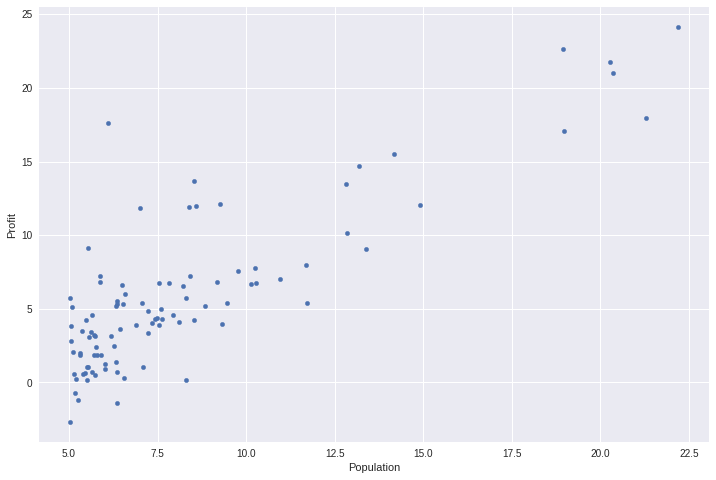

In [47]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [0]:
#@title Data 1 Changed
# data = data * 1.3
# data.head()

In [0]:
# data.describe()

In [0]:
# data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [0]:
# This shows (0, 0) also in the Popu. vs Prof. plot so we can guess and verify m and c using the figure
# row_data = data.iloc[:1, :].copy()
# row_data.at[0, 'Population'] = 0
# row_data.at[0, 'Profit'] = 0
# print(row_data)

# data = data.append(row_data, ignore_index=True)
# print(data.head(), data.tail(), sep='\n')

In [0]:
# data.describe()

In [0]:
# data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [0]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [0]:
data.insert(0, 'Ones', 1)

In [56]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

type(X)

pandas.core.frame.DataFrame

In [57]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [58]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [0]:
#@title
# row_X = X.iloc[:1, :].copy()      ## copy() -> else the first row in the X itself gets altered by the new value
# row_X.at[0, 'Population'] = 0
# print(row_X)
# X = X.append(row_X, ignore_index=True)
# print(X.head())
# print(X.tail())

# row_y = y.iloc[:1, :].copy()
# %timeit row_y.at[0, 'Profit'] = 0        ###> %timeit
# print(row_y)
# y = y.append(row_y, ignore_index=True)
# print(y.head(), y.tail(), sep='\n')

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

theta_0 = 0    #@param
theta_1 = 0    #@param

theta = np.matrix(np.array([theta_0, theta_1]))

In [61]:
theta

matrix([[0, 0]])

In [62]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [63]:
computeCost(X, y, theta)

32.072733877455676

In [0]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [0]:
#@title Params
alpha = 0.005 #@param {type:"number"}
iters = 11000 #@param {type:"integer"}

In [118]:
#@title Final theta (c, m) { vertical-output: true }
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.89558511,  1.19301398]])

In [108]:
computeCost(X, y, g)

4.476971375977748

Text(0.5,1,'Predicted Profit vs. Population Size')

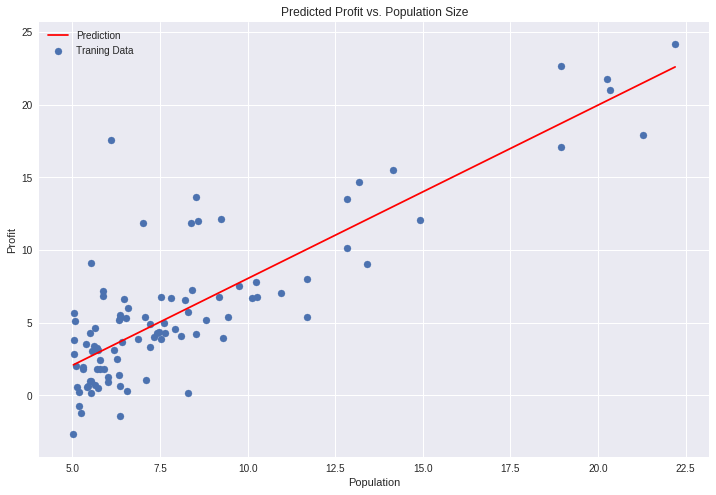

In [116]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5,1,'Error vs. Training Epoch')

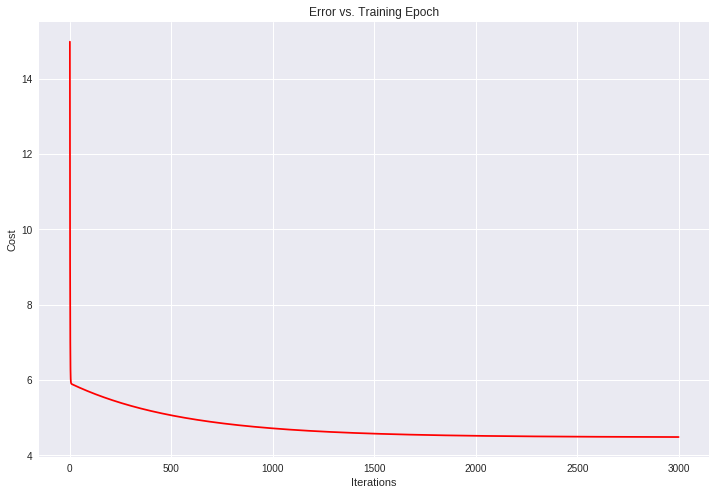

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

---
# Data 2



In [70]:
path = 'ipython-notebooks' + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [71]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [72]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068670923381778

Text(0.5,1,'Error vs. Training Epoch')

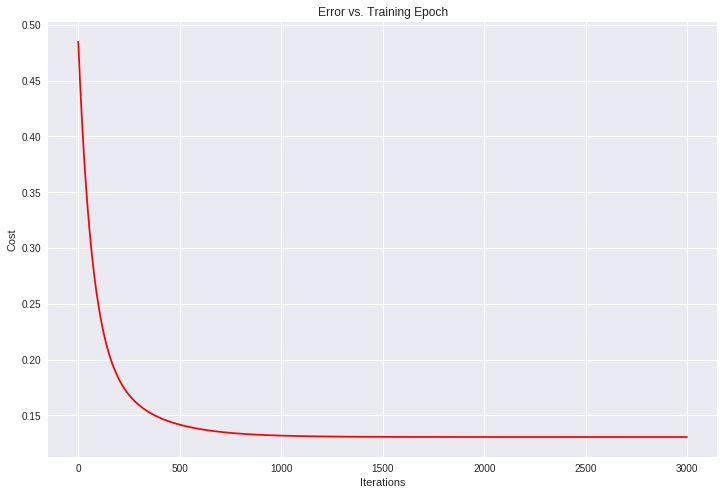

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# sklearn

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(X, y)

In [75]:
#@title (0, m) { vertical-output: true }
model.coef_        ##??? What is 0 in the output?

array([[0.        , 1.19303364]])

In [76]:
#@title c { vertical-output: true }
model.intercept_

array([-3.89578088])

In [77]:
model.score(X, y)

0.7020315537841397

Text(0.5,1,'Predicted Profit vs. Population Size')

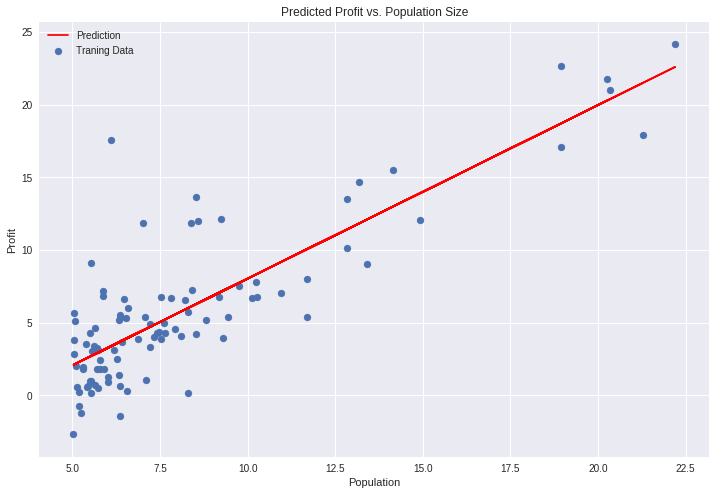

In [78]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')